# Neural Network
## Perceptron to Neural Network
![](https://miro.medium.com/proxy/1*DW0Ccmj1hZ0OvSXi7Kz5MQ.jpeg)

## Activation Function

- Activation Function은 어떠한 신호를 입력받아 이를 적절한 처리를 하여 출력해주는함수입니다. 이를 통해 출력된 신호가 다음 단계에서 활성화 되는지를 결정
- 각 층위에서 나오는 output을 복잡한 모델로 만들어주는 역할
- 비선형(non-linear)적으로 만들어 모델을 복잡하게 함


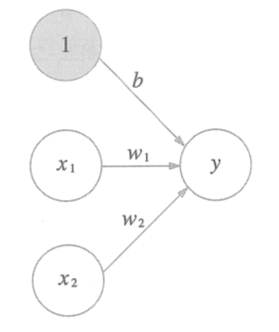

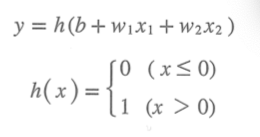

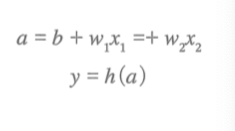

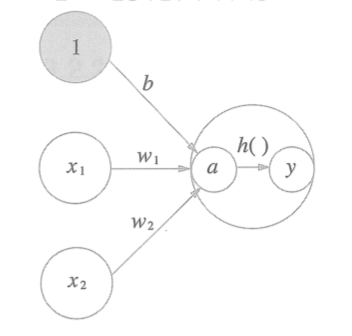
- ![](https://missinglink.ai/wp-content/uploads/2018/11/activationfunction-1.png)

즉, activation function은 input에 non-linearity를 부여해준다. 
모델을 더 복잡하게 만들어주는 거다. 

## Types of Activation Functions
- (based on https://medium.com/the-theory-of-everything/understanding-activation-functions-in-neural-networks-9491262884e0)
### Step Function
- If the value of Y is above a certain value, declare it activated. If it’s less than the threshold, then say it’s not.
- Activation function A = “activated” if Y > threshold else not
- Alternatively, A = 1 if y> threshold, 0 otherwise
- ![](https://miro.medium.com/max/650/0*8U8_aa9hMsGmzMY2.)
- Suppose you are creating a binary classifier. Something which should say a “yes” or “no” ( activate or not activate ). A Step function could do that for you! That’s exactly what it does, say a 1 or 0. 
- Now, think about the use case where you would want multiple such neurons to be connected to bring in more classes. Class1, class2, class3 etc. 
- What will happen if more than 1 neuron is “activated”. All neurons will output a 1 ( from step function). Now what would you decide? Which class is it? 
- You would want the network to activate only 1 neuron and others should be 0. This is harder to train and converge this way. 
- It would have been better if the activation was not binary and it instead would say “50% activated” or “20% activated” and so on. 
- And then if more than 1 neuron activates, you could find which neuron has the “highest activation” and so on 
- So we want something to give us intermediate ( analog ) activation values rather than saying “activated” or not ( binary ).

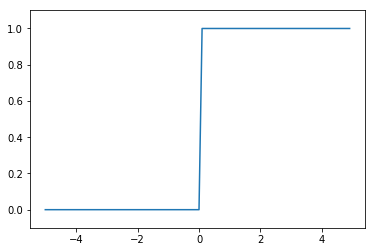

In [42]:
#Step Function

# coding: utf-8
import numpy as np
import matplotlib.pylab as plt


def step_function(x):
    return np.array(x > 0, dtype=np.int)

X = np.arange(-5.0, 5.0, 0.1)
Y = step_function(X)
plt.plot(X, Y)
plt.ylim(-0.1, 1.1)  # y축의 범위 지정
plt.show()

## Linear Function
- A = cx
- A straight line function where activation is proportional to input ( which is the weighted sum from neuron ).
- Problem: for this function, derivative is a constant.
- A = cx, derivative with respect to x is c. That means, the gradient has no relationship with X. It is a constant gradient and the descent is going to be on constant gradient. 
- If there is an error in prediction, the changes made by back propagation is constant and not depending on the change in input delta(x)
- Think about connected layers. Each layer is activated by a linear function. That activation in turn goes into the next level as input and the second layer calculates weighted sum on that input and it in turn, fires based on another linear activation function.
- No matter how many layers we have, if all are linear in nature, the final activation function of last layer is nothing but just a linear function of the input of first layer!
- No matter how we stack, the whole network is still equivalent to a single layer with linear activation ( a combination of linear functions in a linear manner is still another linear function ).

In [ ]:
즉, linear function은 activation 함수로서 의미가 없다. c라는 constant gradient가 계속 남을 거기 때문에, 마치 하나의 layer가 남은 거와 다름없다. 

## Sigmoid Function
- ![](https://miro.medium.com/max/448/1*DHN75JRJ_EQgGc0spfqLtQ.png)
- ![](https://miro.medium.com/max/1200/0*5euYS7InCmDP08ir.)
- Tt is nonlinear in nature. Combinations of this function are also nonlinear! Now we can stack layers. 
- What about non binary activations? Yes, that too!. It will give an analog activation unlike step function. It has a smooth gradient too.
- Between X values -2 to 2, Y values are very steep. Which means, any small changes in the values of X in that region will cause values of Y to change significantly. 
- That means this function has a tendency to bring the Y values to either end of the curve.
- Another advantage of this activation function is, unlike linear function, the output of the activation function is always going to be in range (0,1) compared to (-inf, inf) of linear function. So we have our activations bound in a range
- Problem: towards either end of the sigmoid function, the Y values tend to respond very less to changes in X. The gradient at that region is going to be small. It gives rise to a problem of “vanishing gradients”

In [ ]:
시그모이드의 한 가지 단점. -6~-2, 2~6에서는 거의 Y값이 X값의 변화에 둔하다. 기울기가 사라져버린는 문제가 생긴다. 
시그모이드 단점: 기울기가 늘 양수이다. 그래서 경사하강을 할 때 +, +, +, + 이렇게 내려가니까 지그재그로 내려가게 된다. 
    암튼 vanishing gradient의 문제 떄문에, 레이어가 적을 때 쓰거나, 아니면 거의 끝단의 레이어에서만 쓴다.

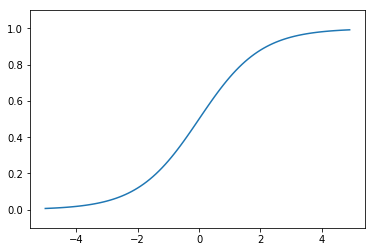

In [43]:
#sigmoid function
# coding: utf-8
import numpy as np
import matplotlib.pylab as plt


def sigmoid(x):
    return 1 / (1 + np.exp(-x))

X = np.arange(-5.0, 5.0, 0.1)
Y = sigmoid(X)
plt.plot(X, Y)
plt.ylim(-0.1, 1.1)
plt.show()

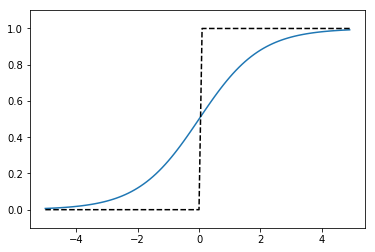

In [44]:
#sig, step compare
#매끄러움의 차이. sigmoid의 매끈함이 신경망 학습에서 중요한 역할
#퍼셉트론에서는 0 또는 1이 흐르는 반면, sigmoid에서는 연속적인 실수값이 흐름
# coding: utf-8
import numpy as np
import matplotlib.pylab as plt


def sigmoid(x):
    return 1 / (1 + np.exp(-x))


def step_function(x):
    return np.array(x > 0, dtype=np.int)

x = np.arange(-5.0, 5.0, 0.1)
y1 = sigmoid(x)
y2 = step_function(x)

plt.plot(x, y1)
plt.plot(x, y2, 'k--')
plt.ylim(-0.1, 1.1) # y축 범위 지정
plt.show()

## Tanh Function
- ![](https://miro.medium.com/max/800/0*YJ27cYXmTAUFZc9Z.)
- ![](https://miro.medium.com/max/1288/1*WNTLbBRWFiHPoXvyZ6s9eg.png)
- This looks very similar to sigmoid. In fact, it is a scaled sigmoid function!
- ![](https://miro.medium.com/max/1232/1*U-677uRd-StXbAgrAnX2hw.png)
- This has characteristics similar to sigmoid that we discussed above. 
- It is nonlinear in nature, so great we can stack layers! 
- It is bound to range (-1, 1) so no worries of activations blowing up. 
- One point to mention is that the gradient is stronger for tanh than sigmoid ( derivatives are steeper).
- Deciding between the sigmoid or tanh will depend on your requirement of gradient strength. Like sigmoid, tanh also has the vanishing gradient problem.

# 즉, tanh는 시그모이드를 증폭시키고 더 가파르게 만든 것이다. 그러니 시그모이드의 vanishing gradient 문제는 사라지지 않는다. 

## ReLu
- A(x) = max(0,x)
- ![](https://miro.medium.com/max/622/0*vGJq0cIuvTB9dvf5.)
- It gives an output x if x is positive and 0 otherwise.
- At first look this would look like having the same problems of linear function, as it is linear in positive axis. 
- First of all, ReLu is nonlinear in nature. And combinations of ReLu are also non linear! ( in fact it is a good approximator. Any function can be approximated with combinations of ReLu). This means we can stack layers. 
- The range of ReLu is [0, inf] This means it can blow up the activation.
- Another point that I would like to discuss here is the sparsity of the activation. 
- Imagine a big neural network with a lot of neurons. Using a sigmoid or tanh will cause almost all neurons to fire in an analog way. 
- That means almost all activations will be processed to describe the output of a network. 
- In other words the activation is dense. This is costly. We would ideally want a few neurons in the network to not activate and thereby making the activations sparse and efficient.
- ReLu give us this benefit. Imagine a network with random initialized weights ( or normalised ) and almost 50% of the network yields 0 activation because of the characteristic of ReLu ( output 0 for negative values of x ). 
- This means a fewer neurons are firing ( sparse activation ) and the network is lighter. Woah, nice! ReLu seems to be awesome! Yes it is, but nothing is flawless.. Not even ReLu.
- Because of the horizontal line in ReLu( for negative X ), the gradient can go towards 0. 
- For activations in that region of ReLu, gradient will be 0 because of which the weights will not get adjusted during descent. 
- That means, those neurons which go into that state will stop responding to variations in error/ input ( simply because gradient is 0, nothing changes ). 
- This is called **dying ReLu problem.** This problem can cause several neurons to just die and not respond making a substantial part of the network passive. 
- There are variations in ReLu to mitigate this issue by simply making the horizontal line into non-horizontal component. 
- For example y = 0.01x for x<0 will make it a slightly inclined line rather than horizontal line. 
- This is **leaky ReLu.** There are other variations too. The main idea is to let the gradient be non zero and recover during training eventually.
- ReLu is less computationally expensive than tanh and sigmoid because it involves simpler mathematical operations.

## 장점: 0보다 작은 값들 (즉, 별로 strong 하지 않은 값들)은 빨리 버리기 때문에, activate가 라이트 해진다. 그리고 0보다 큰 값들은 자기자신이 그대로 반영되기 때문에 아주 좋다. 

## 문제점: dying ReLu problem. 만약 우연하게 weight 값들을 0으로 초기화해준다면, 전부 값이 사라진다.

## Which one do we use?
- Now, which activation functions to use. Does that mean we just use ReLu for everything we do? Or sigmoid or tanh? Well, yes and no. 
- When you know the function you are trying to approximate has certain characteristics, you can choose an activation function which will approximate the function faster leading to faster training process. 
- For example, a sigmoid works well for a classifier ( see the graph of sigmoid, doesn’t it show the properties of an ideal classifier? ) because approximating a classifier function as combinations of sigmoid is easier than maybe ReLu, for example. Which will lead to faster training process and convergence. 
- You can use your own custom functions too!. If you don’t know the nature of the function you are trying to learn, then maybe i would suggest start with ReLu, and then work backwards. ReLu works most of the time as a general approximator!

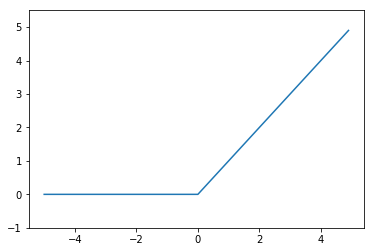

In [33]:
# coding: utf-8
import numpy as np
import matplotlib.pylab as plt


def relu(x):
    return np.maximum(0, x)

x = np.arange(-5.0, 5.0, 0.1)
y = relu(x)
plt.plot(x, y)
plt.ylim(-1.0, 5.5)
plt.show()

## N-dimensional Array
- Matrix dot product
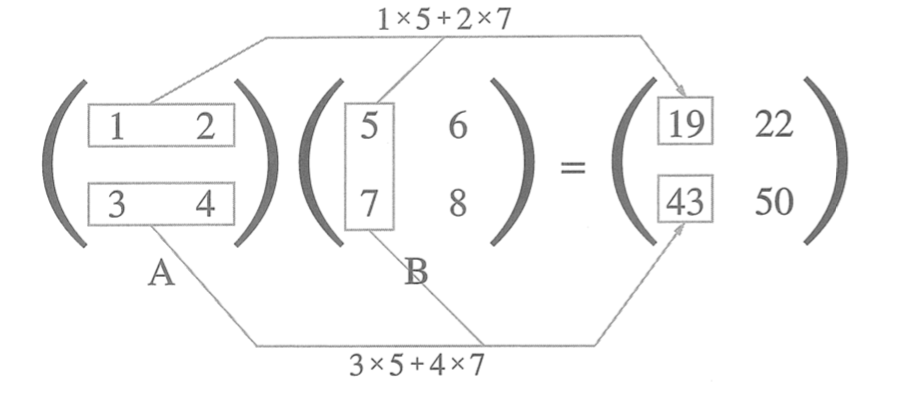
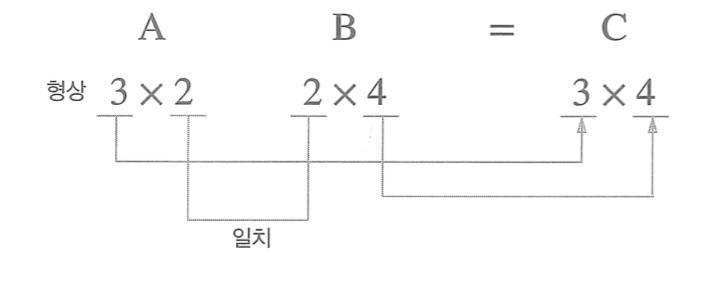
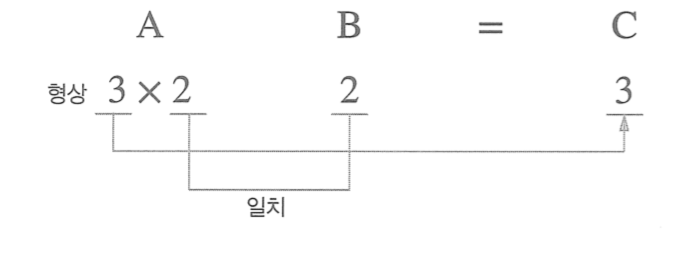

In [49]:
A = np.array([[1,2, 3],[4,5,6]])
print("A Shape", A.shape)
B = np.array([[1,2], [3,4], [5, 6]])
print("B Shape", B.shape)
np.dot(A, B)

A Shape (2, 3)
B Shape (3, 2)


array([[22, 28],
       [49, 64]])

In [18]:
import numpy as np
#A = np.array([[1,2],[3,4]])
A = np.array([1,2])
print("A Shape", A.shape)
B = np.array([[3,4], [5,6]])
print("B Shape", B.shape)
print(np.dot(A, B))
print(np.dot(B, A))

A Shape (2,)
B Shape (2, 2)
[13 16]
[11 17]


In [33]:
A = np.array([[1,2, 3],[4,5,6]])
print("A Shape", A.shape)
B = np.array([1,2])
A.shape
B.shape
print("B Shape", B.shape)
print(np.dot(B,A))
#print(np.dot(A, B))
print((A.T))
print(np.dot(A.T, B))

A Shape (2, 3)
B Shape (2,)
[ 9 12 15]
[[1 4]
 [2 5]
 [3 6]]
[ 9 12 15]


### 신경망의 내적
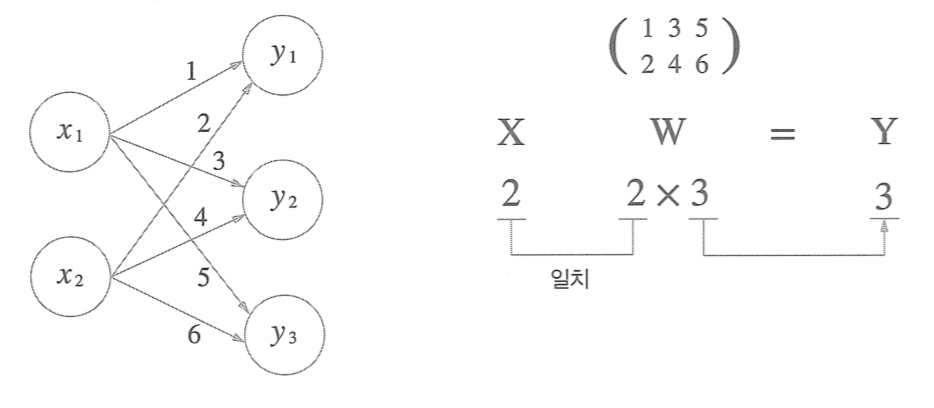

## 3층 신경망
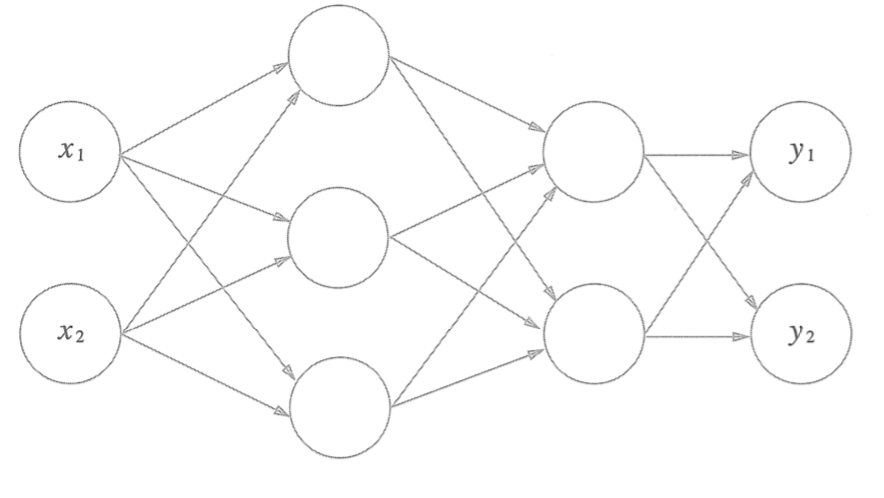
- 입력층에서 1층으로 신호 전달
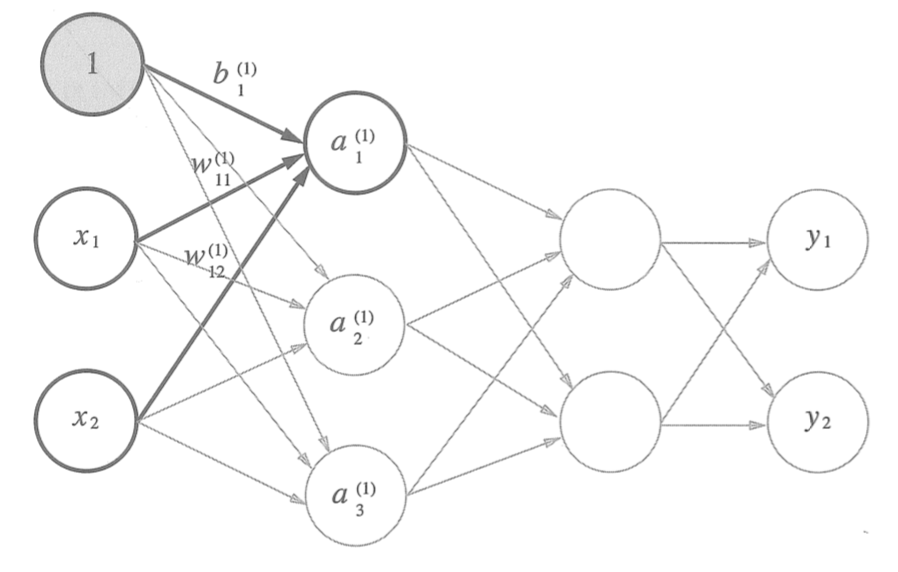
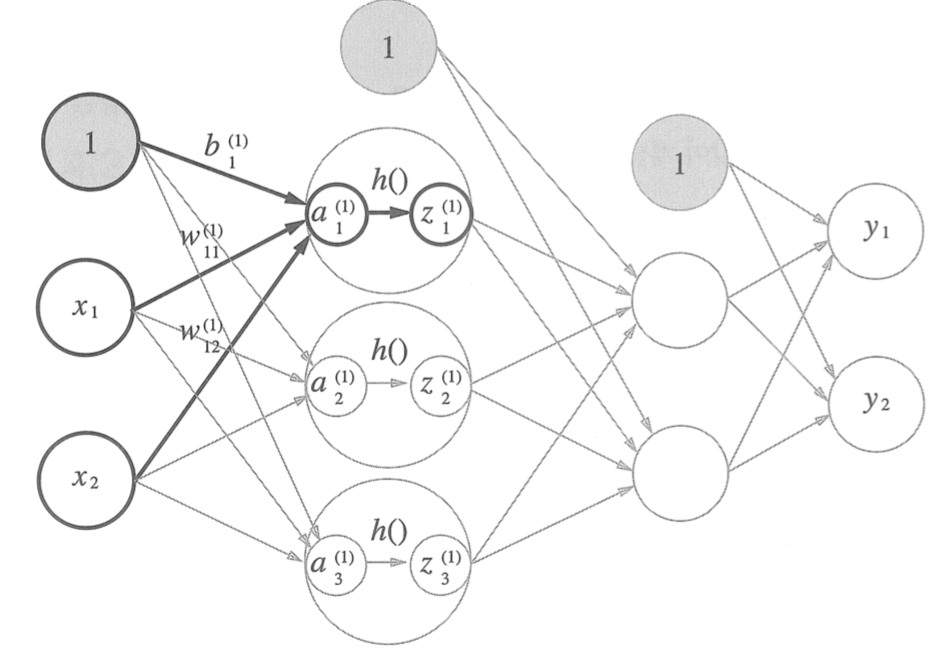
- 1층에서 2층으로의 신호 전달
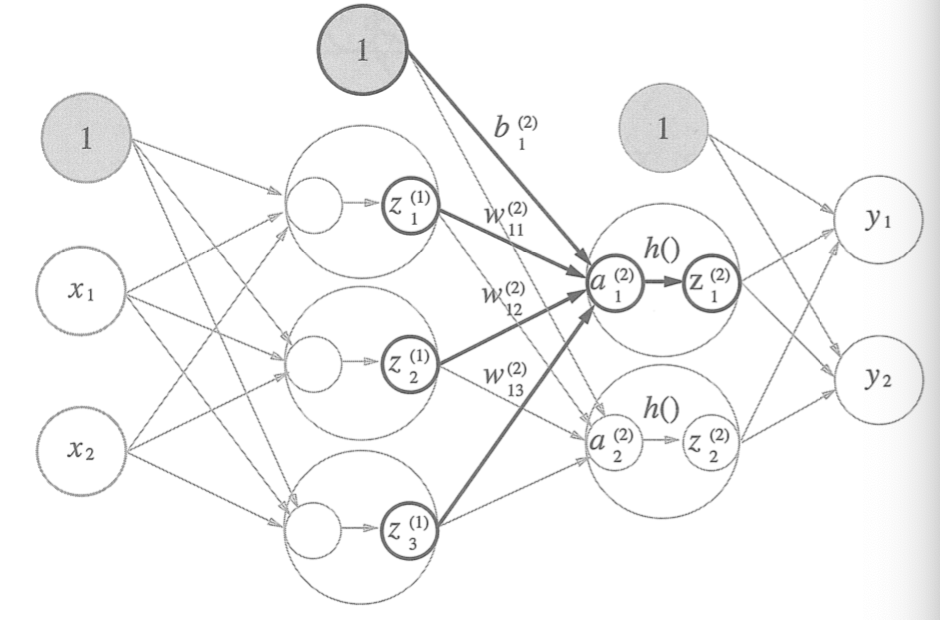
- 2층에서 출력층으로 신호 전달
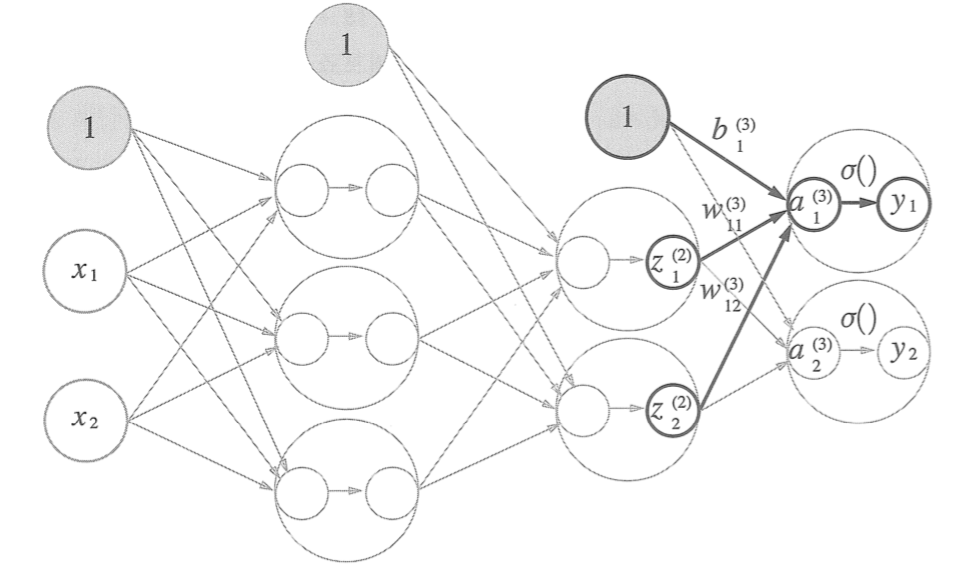

In [50]:
#Three Layer network
import numpy as np

def identity_function(x):
    return x

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def init_network():
    network = {}
    network['W1'] = np.array([[0.1, 0.3, 0.5], [0.2, 0.4, 0.6]])
    network['b1'] = np.array([0.1, 0.2, 0.3])
    network['W2'] = np.array([[0.1, 0.4],[0.2, 0.5], [0.3,0.6]])
    network['b2'] = np.array([0.1, 0.2])
    network['W3'] = np.array([[0.1, 0.3], [0.2, 0.4]])
    network['b3'] = np.array([0.1, 0.2])
    
    return network

def forward(network, x):
    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']
    
    a1 = np.dot(x, W1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, W2) + b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2, W3) + b3
    y = identity_function(a3)
    
    return y

network = init_network()
x = np.array([1.0, 0.5])
y = forward(network, x)
print(y)

[0.31682708 0.69627909]


## 출력층
- 분류(classification) -> 데이터가 어느 클래스에 속하느냐를 결정
- 회귀(regression) -> 입력데이터에서 (연속적인) 수치를 예측하는 문제

### Identity Function 

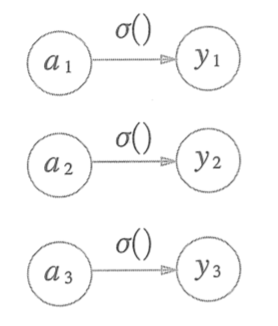


### Softmax Function
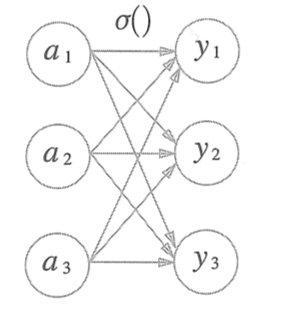
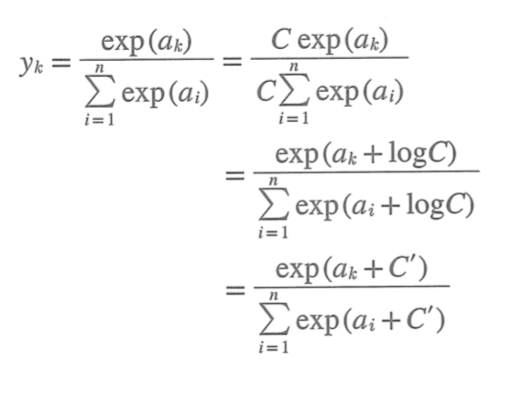

In [51]:
def softmax(x):
    if x.ndim == 2:
        x = x.T
        x = x - np.max(x, axis=0)
        y = np.exp(x) / np.sum(np.exp(x), axis=0)
        return y.T 

    x = x - np.max(x) # 오버플로 대책
    return np.exp(x) / np.sum(np.exp(x))

In [20]:
#softmax test
a = np.array([0.3, 2.9, 4.])
b = np.array([[0.3, 2.9], [2.9, 4]])
y = softmax(a)
print(y)
np.sum(y)
y = softmax(b)
print(y)

[0.01821127 0.24519181 0.73659691]
[[0.06913842 0.93086158]
 [0.24973989 0.75026011]]


### Another Example: Layers, Activation Function...

<Figure size 1152x2304 with 0 Axes>

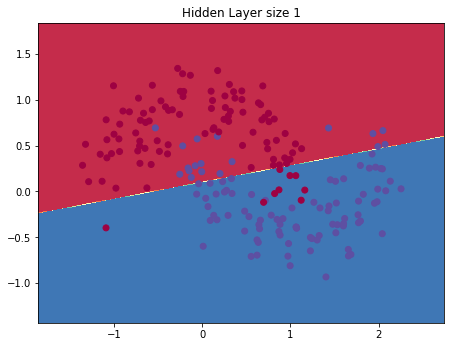

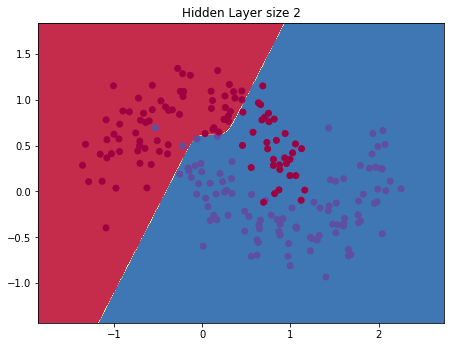

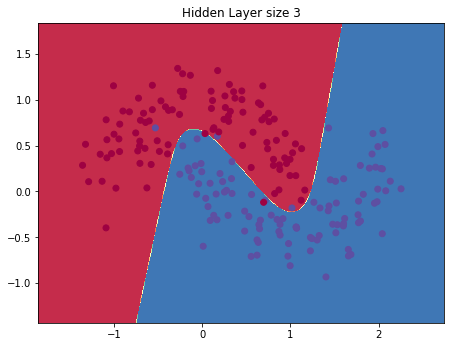

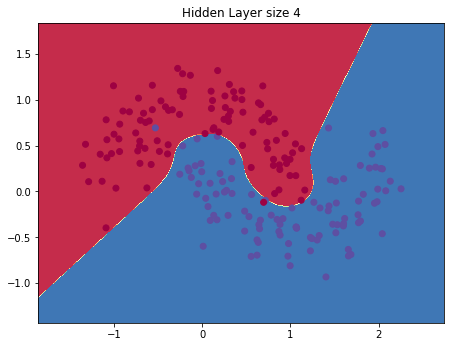

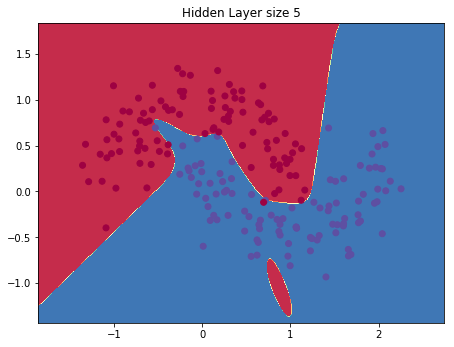

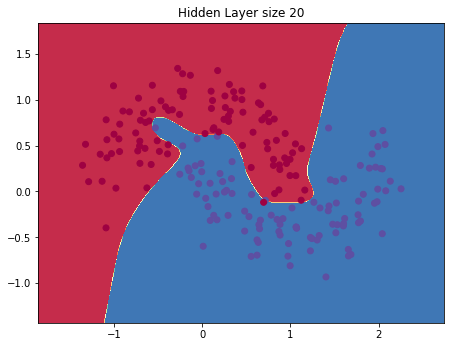

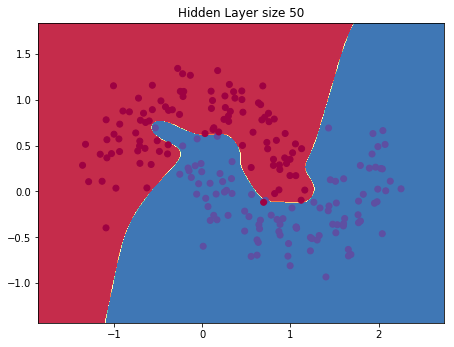

In [13]:
#ann

__author__ = 'm.bashari'
import numpy as np
from sklearn import datasets, linear_model
import matplotlib.pyplot as plt


class Config:
    nn_input_dim = 2  # input layer dimensionality
    nn_output_dim = 2  # output layer dimensionality
    # Gradient descent parameters (I picked these by hand)
    epsilon = 0.01  # learning rate for gradient descent
    reg_lambda = 0.01  # regularization strength


def generate_data():
    np.random.seed(0)
    X, y = datasets.make_moons(200, noise=0.20)
    return X, y


def visualize(X, y, model):
    # plt.scatter(X[:, 0], X[:, 1], s=40, c=y, cmap=plt.cm.Spectral)
    # plt.show()
    plot_decision_boundary(lambda x:predict(model,x), X, y)
    plt.title("Logistic Regression")


def plot_decision_boundary(pred_func, X, y):
    # Set min and max values and give it some padding
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    h = 0.01
    # Generate a grid of points with distance h between them
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    # Predict the function value for the whole gid
    Z = pred_func(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    # Plot the contour and training examples
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Spectral)
    plt.show()


# Helper function to evaluate the total loss on the dataset
def calculate_loss(model, X, y):
    num_examples = len(X)  # training set size
    W1, b1, W2, b2 = model['W1'], model['b1'], model['W2'], model['b2']
    # Forward propagation to calculate our predictions
    z1 = X.dot(W1) + b1
    a1 = np.tanh(z1)
    z2 = a1.dot(W2) + b2
    exp_scores = np.exp(z2)
    probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)
    # Calculating the loss
    corect_logprobs = -np.log(probs[range(num_examples), y])
    data_loss = np.sum(corect_logprobs)
    # Add regulatization term to loss (optional)
    data_loss += Config.reg_lambda / 2 * (np.sum(np.square(W1)) + np.sum(np.square(W2)))
    return 1. / num_examples * data_loss


def predict(model, x):
    W1, b1, W2, b2 = model['W1'], model['b1'], model['W2'], model['b2']
    # Forward propagation
    z1 = x.dot(W1) + b1
    a1 = np.tanh(z1)
    z2 = a1.dot(W2) + b2
    exp_scores = np.exp(z2)
    probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)
    return np.argmax(probs, axis=1)


# This function learns parameters for the neural network and returns the model.
# - nn_hdim: Number of nodes in the hidden layer
# - num_passes: Number of passes through the training data for gradient descent
# - print_loss: If True, print the loss every 1000 iterations
def build_model(X, y, nn_hdim, num_passes=20000, print_loss=False):
    # Initialize the parameters to random values. We need to learn these.
    num_examples = len(X)
    np.random.seed(0)
    W1 = np.random.randn(Config.nn_input_dim, nn_hdim) / np.sqrt(Config.nn_input_dim)
    b1 = np.zeros((1, nn_hdim))
    W2 = np.random.randn(nn_hdim, Config.nn_output_dim) / np.sqrt(nn_hdim)
    b2 = np.zeros((1, Config.nn_output_dim))

    # This is what we return at the end
    model = {}

    # Gradient descent. For each batch...
    for i in range(0, num_passes):

        # Forward propagation
        z1 = X.dot(W1) + b1
        a1 = np.tanh(z1)
        z2 = a1.dot(W2) + b2
        exp_scores = np.exp(z2)
        probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)

        # Backpropagation
        delta3 = probs
        delta3[range(num_examples), y] -= 1
        dW2 = (a1.T).dot(delta3)
        db2 = np.sum(delta3, axis=0, keepdims=True)
        delta2 = delta3.dot(W2.T) * (1 - np.power(a1, 2))
        dW1 = np.dot(X.T, delta2)
        db1 = np.sum(delta2, axis=0)

        # Add regularization terms (b1 and b2 don't have regularization terms)
        dW2 += Config.reg_lambda * W2
        dW1 += Config.reg_lambda * W1

        # Gradient descent parameter update
        W1 += -Config.epsilon * dW1
        b1 += -Config.epsilon * db1
        W2 += -Config.epsilon * dW2
        b2 += -Config.epsilon * db2

        # Assign new parameters to the model
        model = {'W1': W1, 'b1': b1, 'W2': W2, 'b2': b2}

        # Optionally print the loss.
        # This is expensive because it uses the whole dataset, so we don't want to do it too often.
        if print_loss and i % 1000 == 0:
            print("Loss after iteration %i: %f" % (i, calculate_loss(model, X, y)))

    return model


def classify(X, y):
    # clf = linear_model.LogisticRegressionCV()
    # clf.fit(X, y)
    # return clf

    pass

'''
# original def main()
def main():
    X, y = generate_data()
    model = build_model(X, y, 3, print_loss=True)
    visualize(X, y, model)


if __name__ == "__main__":
    main()
'''

#modify def main() to see varying hidden layers
def main():
    X, y = generate_data()
    plt.figure(figsize=(16, 32))
    hidden_layer_dimensions = [1, 2, 3, 4, 5, 20, 50]

    for i, nn_hdim in enumerate(hidden_layer_dimensions):
        plt.figure(figsize=(16, 32))
        plt.subplot(5, 2, i+1)

        plt.title('Hidden Layer size %d' % nn_hdim)
        model = build_model(X, y, nn_hdim)
        plot_decision_boundary(lambda x:predict(model,x), X, y)
    plt.show()

if __name__ == "__main__":
    main()

## MNIST Dataset
- 0~9까지의 숫자 이미지
- 60,000 훈련 이미지, 10,000 시험 이미지
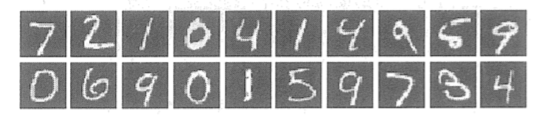

## Deep Learning From Scratch의 소스코드를 가져와야 함

https://github.com/WegraLee/deep-learning-from-scratch

In [1]:
#Mnist --Show
# coding: utf-8
import sys, os
sys.path.append(os.pardir)  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
import numpy as np
from dataset.mnist import load_mnist
from PIL import Image


def img_show(img):
    pil_img = Image.fromarray(np.uint8(img))
    pil_img.show()

(x_train, t_train), (x_test, t_test) = load_mnist(flatten=True, normalize=False)

img = x_train[0]
label = t_train[0]
print(label)  # 5

print(img.shape)  # (784,)
img = img.reshape(28, 28)  # 형상을 원래 이미지의 크기로 변형
print(img.shape)  # (28, 28)

img_show(img)

5
(784,)
(28, 28)


In [3]:
#simple MNIST neural network
#coding: utf-8
import sys, os
sys.path.append(os.pardir)  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
import numpy as np
import pickle
from dataset.mnist import load_mnist
from common.functions import sigmoid, softmax


def get_data():
    (x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, flatten=True, one_hot_label=False)
    return x_test, t_test


def init_network():
    with open("sample_weight.pkl", 'rb') as f:
        network = pickle.load(f)
    return network


def predict(network, x):
    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']

    a1 = np.dot(x, W1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, W2) + b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2, W3) + b3
    y = softmax(a3)

    return y


x, t = get_data()
network = init_network()
accuracy_cnt = 0
for i in range(len(x)):
    y = predict(network, x[i])
    p= np.argmax(y) # 확률이 가장 높은 원소의 인덱스를 얻는다.
    if p == t[i]:
        accuracy_cnt += 1

print("Accuracy:" + str(float(accuracy_cnt) / len(x)))

Accuracy:0.9352


In [4]:
#Batch Process

# coding: utf-8
import sys, os
sys.path.append(os.pardir)  # 부모 디렉터리의 파일을 가져올 수 있도록
import numpy as np
import pickle
from dataset.mnist import load_mnist
from common.functions import sigmoid, softmax, relu, step_function


def get_data():
    (x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, flatten=True, one_hot_label=False)
    return x_test, t_test


def init_network():
    with open("sample_weight.pkl", 'rb') as f:
        network = pickle.load(f)
    return network


def predict(network, x):
    w1, w2, w3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']

    a1 = np.dot(x, w1) + b1
    z1 = step_function(a1)
    a2 = np.dot(z1, w2) + b2
    z2 = step_function(a2)
    a3 = np.dot(z2, w3) + b3
    y = softmax(a3)

    return y


x, t = get_data()
network = init_network()

batch_size = 100 # 배치 크기
accuracy_cnt = 0

for i in range(0, len(x), batch_size):
    x_batch = x[i:i+batch_size]
    y_batch = predict(network, x_batch)
    p = np.argmax(y_batch, axis=1)
    accuracy_cnt += np.sum(p == t[i:i+batch_size])

print("Accuracy:" + str(float(accuracy_cnt) / len(x)))

Accuracy:0.9182


### argmax() 테스트 용

In [8]:
#argmax test
x = np.array([[0.9, 0.8, 9.7], [2.3, 5.4, 0.6], [0.2, 0.5, 0.3], [0.8, 8.3, 0.1]])
print(x.shape)
print(x)
y = np.argmax(x, 0)
print(y)
y = np.argmax(x,1)
print(y)

(4, 3)
[[0.9 0.8 9.7]
 [2.3 5.4 0.6]
 [0.2 0.5 0.3]
 [0.8 8.3 0.1]]
[1 3 0]
[2 1 1 1]
